In [3]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns




In [5]:
### LOAD DATA
#Reading dataset
employee_df=pd.read_csv('C:/Users/lcast/Desktop/DS/GitHub/Employee-churn-predtion/Data/Human_Resources.csv')

In [12]:
## 1. DATA DESCRIPTION, STRUCTURE AND INITIAL INTUITIONS
employee_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [16]:
employee_df['EmployeeNumber'].value_counts()

2046    1
641     1
644     1
645     1
647     1
       ..
1364    1
1367    1
1368    1
1369    1
2048    1
Name: EmployeeNumber, Length: 1470, dtype: int64

### 1.1 Data Description
- Age: Age of the employee.
- Attrition: Target variable. Indicates wether the employee left (1) or stayed (0)
- BusinessTravel: Ferquency of travel. Values: Travel_Rarely', 'Travel_Frequently', 'Non-Travel'
- DailyRate: Daily salary
- Department: Department the employee belong to. Values: 'Sales', 'Research & Development', 'Human Resources'
- DistanceFromHome: Distance from home to the office/working place.
- Education: Level of education. Values: 1'Below College',2'College',3 'Bachelor',4 'Master',5 'Doctor'
- Education Field: field of education. Values: 'Life Sciences', 'Other', 'Medical', 'Marketing','Technical Degree', 'Human Resources'
- EmployeeCount: number of employees in the company.
- EmployeeNumber: internal company employee id.
- Environment Satisfaction: index of satisfaction with the comapny environment. Values: 1 'Low', 2 'Medium',3 'High',4 'Very High'
- Gender: Female/Male
- HourlyRate: Houly salary rate
- JobInvolvement: psychological and emotional extent to which someone participates in his/her work, profession, and company. Values:1 'Low',2 'Medium',3 'High',4 'Very High'
- JobLevel: job level from less level (1) to higher level (5)
- JobRole: job role. Values: 'Sales Executive', 'Research Scientist', 'Laboratory Technician','Manufacturing Director', 'Healthcare Representative', 'Manager','Sales Representative', 'Research Director', 'Human Resources'
- JobSatisfaction: job satisfaction. Values: 1 'Low',2 'Medium',3 'High',4 'Very High'
- MaritalStatus: marital status. Values: 'Single', 'Married', 'Divorced'
- MonthlyIncome: monthly income of the employee.
- MonthlyRate: monthly salary of the employee.
- NumCompaniesWorked:number of companies that the employee has worked.
- Over18: indicates if the employer is older tahn 18 or not.
- OverTime: indicates if the mployee works overtime or not.
- PercentSalaryHike: percentage of salary increase.
- PerformanceRating: performance rating. Values: 1 'Low',2 'Good',3 'Excellent',4 'Outstanding'
- RelationshipSatisfaction: Degree of satisfaction with manager/other employees? values: 1 'Low',2 'Medium',3 'High',4 'Very High'
- StandardHours: number of hours worked.
- StockOptionLevel: option to company stock options as part of the compensation package.
- TotalWorkingYears: number of years worked for the company.
- TrainingTimesLastYear: how many times the employee received training during last year.
- WorkLifeBalance: degree of work-life balance. Values: 1 'Bad',2 'Good',3 'Better',4 'Best'
- YearsAtCompany: number of years working in the company.
- YearsInCurrentRole: number of years in current role.
- YearsSinceLastPromotion: number of years since last promotion.
- YearsWithCurrManager: number of years with current manager.

### 1.2 Data Structue

In [8]:
#First rows of the dataset
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Total of 34 attributes and one target variables. 1470 instances with no missing values. Nine  of the attributes types are object and the remaining numerical. Most of this numerical are actually categorical variables that have been encoded (for example WorkLifeBalance values are 1/2/3/4 for Bad/Good/Better/BEst, respetively).


To get a quick feel of the frequency distribution  we plot an histogram for each numerical attribute:

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EmployeeCount'}>],
       [<AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>],
       [<AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>],
       [<AxesSubplot:title={'center':'PerformanceRating'}>,
        <AxesSubplot:title={'center':'RelationshipSatisfaction'}>,
        <AxesSubplot:title={'cen

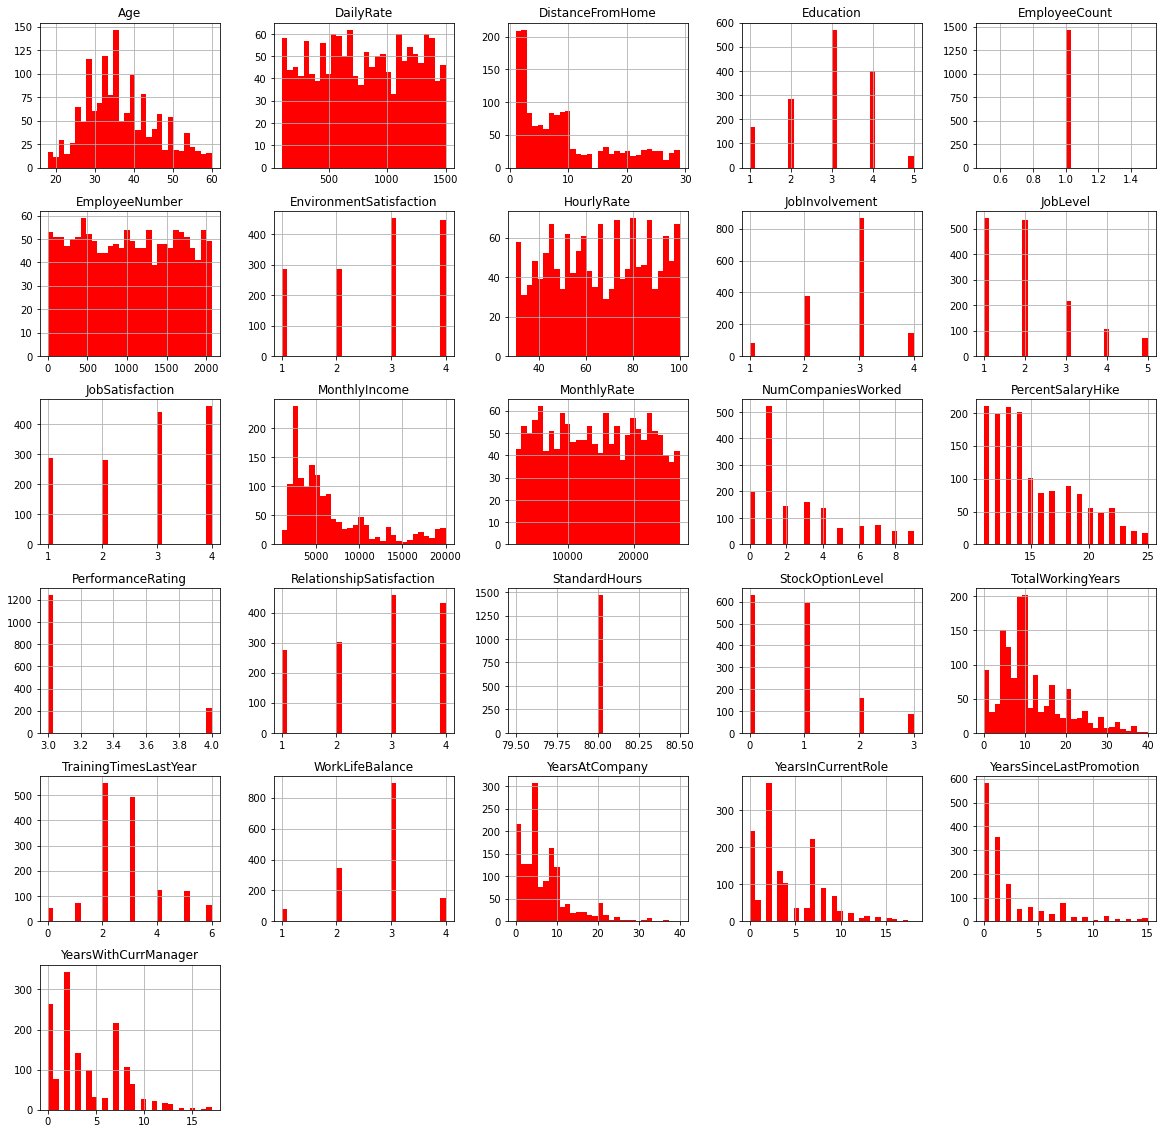

In [10]:
employee_df.hist(bins=30,figsize=(20,20),color='r')

We can draw several observations from the histograms:

- Imbalance dataset:  Around of 85% of the employees in the dataset stayed (attrition=0) and 15% left (attrition=1) left. We might need to explore data balancing methods.
-There are several features that present tailed distributions such as  'DistanceFromHome','MonthlyIncome',TotalWorkingYears' and 'YearsAtCompany'. Depending on the model to be built later, normalization of the data might be required.
- The features 'EmployeeCount', 'Standardhours' and 'Over18'  do not change from one employee to the other, so can be dropped. It  also makes sense to drop 'EmployeeNumber' since is just and employee ID not relevant for the analysis (see 2.Data cleaning and preprocessing  notebook)

In the dataset there are also three features that seem to be related to the salary rate: hourly rate, daily rate and monthly rate. One would think that all this three features should be strongly correlated (daily rate should be an aggregarion of horly rate and monthly rate an aggregation of the daily rate). However, if we plot a correlation heatmap , we can see that threre is no relation:

<AxesSubplot:>

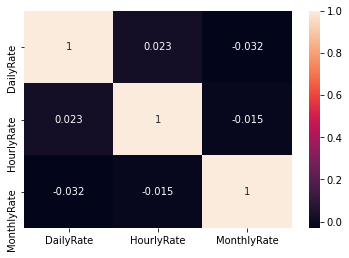

In [11]:
correlations = employee_df[['DailyRate','HourlyRate','MonthlyRate']].corr()
#f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

Since we are not complety sure of what this features represent (in a real situation we would ask to the HR department), and because in the dataset there is the variable Monthly Income that provides information about the salary, we can remove all three (see 2.Data cleaning and preprocessing  notebook)

### 1.3 Initial Intuitions
Before proceding with the EDA, we can make some supositions based just on our judgment, and try to identify which variables contribute to reduce the attrition and which ones increase it.

Variables that we expect to reduce the employee attrition:

- 'HourlyRate','DailyRate', 'MonthlyIncome', 'MonthlyRate': for all this salary related variables, we can expect the employees with higher salaries to have a lower rate of attrition.
- 'PercentSalaryHike': those employees that have speculate had a salary increase probably present a lower rate of attrition
- 'TotalWorkingYears': Usually, mobility among employeers less working years who are starting their careers tends to be higher
-'EnvironmentSatisfaction', 'WorkLifeBalance','JobSatisfaction', 'JobInvolvement','RelationshipSatisfaction': All this variables looks like straighforward. The higher the satisfaction with working conditions, the lesser the reason to leave the company.
- 'PerformanceRating': Seems reasonable to expect that those employees with higher performance rating usually stay ath the company.
- 'JobLevel': Probably more senior workers present a lower rate of attrition.
- 'StockOptionLevel': Employees with this benefit will tend to stay more in the company.
- 'TrainingTimesLastYear': This variable means that the company is investing in their employees. Possibily employees with more trainings are more satisfied and tend to stay longer.
- 'YearsAtCompany','YearsInCurrentRole': employees with more years at the company probably will have less rate of attrition. Years in current role can actually go both ways. Longer time in a role could mean that the employee is satisfied with his/her current role. On the other side, could mean that there is no possibility for a promotion.

    Variables that we expect to increase the employee attrition:

- 'NumCompaniesWorked': An employeer that has a high number of companies work for means that usually changes his/her job.
- 'DistanceFromHome': The longer distance the worst commute, which might impact the satisfaction, work life balance.
- 'OverTime': No need to comment this one, right?
- 'YearsSinceLastPromotion': longer takes to get a promotion, higher attrition.
- 'BusinessTravel': probably those emmployees that travel more frequently have a higher level of attrition.